[SQLite](https://www.sqlite.org/index.html) is one of the most common database engines. All our data is saved on a single file making it portable and easy to develop with. 

Furthermore, SQLite contains most of the SQL commands present in the most powerful database engines which means if we know SQLite, then we know the basics of every other SQL database.

However, the biggest drawbacks of SQLite in a data production system are its advantages in development. Because of its simple use case, SQLite was not built for multiple connections. SQLite only allows a single process to write to the database making it difficult to share with multiple people and services.

Remember that the goal of the data engineer is to unlock an organization's data ecosystem to a wide group of analysts, data scientists, or any other interested member. Sure, we could share the SQLite file around to every interested user, but what if there were 10,000 people interested in the data? SQLite does not scale well for that use case so we require a better choice.

To serve such a vast amount of users, we would be better off using another database engine. In this training we'll use an **open source relational database management system (RDBMS)** called [Postgres](https://www.postgresql.org/). 

Postgres is a much more robust engine that is implemented as a server rather than a single file. As a server, Postgres accepts connections from clients who can run queries like a `SELECT`, `INSERT`, or any other type of SQL query making the data accessible to a wide range of people.

Using this model, Postgres can handle multiple connections to the database solving one of the main data engineering challenges.

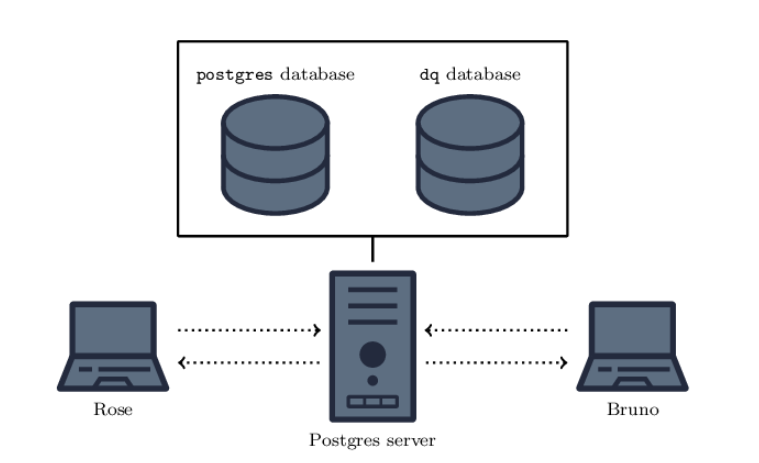

The above diagram illustrates the [client-server model](https://en.wikipedia.org/wiki/Client%E2%80%93server_model) used by **Postgres**. 

Two users, 
* Waqas and 
* Ali 

can both be connected to the same Postgres server and access the databases it contains.

Throughout we will learn the necessary skills to interact and manage a Postgres database. This is a fundamental skill that any data engineer should have, as one of the main roles of a data engineer is to ensure that, data is readily available and stored in a way that makes accessing it easy and efficient.

We will start by learning how to connect to a Postgres database and run simple SQL queries.

In this file we are going to learn how to connect to a Postgres database and perform basic SQL queries. More specifically, we will create a table for storing data representing user accounts. 

The dataset that we will be using is stored in a CSV file named `user_accounts.csv`. Its data does not correspond to real users, it was randomly generated data using [faker](https://github.com/joke2k/faker).

Here are the first five rows from our dataset:

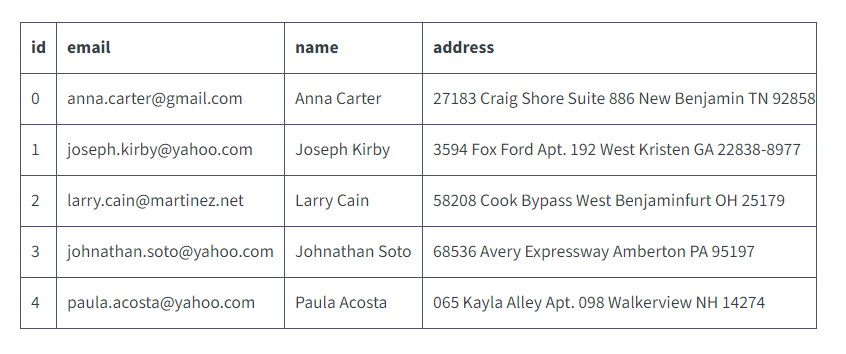

In order to communicate with our **Postgres server**, we will be using the [open source psycopg2 Python library](https://www.psycopg.org/). We can think of `psycopg2` being similar to connecting to a SQLite database using the [sqlite3 library](https://docs.python.org/3.8/library/sqlite3.html).

To connect to the database we use the [`psycopg2.connect()` function](https://www.psycopg.org/docs/module.html#psycopg2.connect) by passing it a string containing the name of the database to which we want to connect to as well as our username. 

So, to connect to a database named `facts` using `psycopg2`, a user named `Waqas` we would do the following:

`import psycopg2
conn = psycopg2.connect("dbname=facts user=Waqas")`

As we see, `Waqas` connects to the database by specifying the database name `dbname` and a user `user` in the `psycopg2.connect()` function. The string `"dbname=facts user=Waqas"` is referred to as **connection string**. 

In the above example, the connection string specifies that Waqas wants to connect to a database named `facts` using his username, `Waqas`.

Because Postgres supports multiple simultaneous connections, Postgres uses multiple users and databases as a way to improve security and division of data. Without those values attached, Postgres will not know who is trying to connect and where so it will fail. 

Once Waqas is connected, he is ready to take advantage of the features Postgres has.

Once he's finished doing what he wants to do with the database, Waqas should close the connection to avoid leaving useless, resource consuming connections opened. 

To do so, he can use the [`connection.close()` method](https://www.psycopg.org/docs/connection.html#connection.close):

`conn.close()`


Connecting to a Postgres database

`import psycopg2
conn = psycopg2.connect("dbname=facts user=Waqas")
conn.close()`

Above we opened a connection to Postgres by using the `psycopg2.connect()` function of the `psycopg2` module. This method takes a connection string as argument that the library uses to connect to the Postgres server. Its return value is a [`connection object`](https://www.psycopg.org/docs/extensions.html#psycopg2.extensions.connection).

The connection object allows the client to interact with the database server until it is closed. To issue commands to the database, we will also need to create a [cursor object](https://www.psycopg.org/docs/cursor.html) by calling the [`connection.cursor()` method](https://www.psycopg.org/docs/connection.html#cursor). 

This object is the one that we will use to execute our commands. Be warned though, whenever we close the connection, we will not be able to issue anymore commands with that connection's cursor.

To execute commands on the Postgres database, we call the [`cursor.execute()` method](https://www.psycopg.org/docs/cursor.html#cursor.execute) with a SQL query passed as a string. This string is often referred to as **query string**. For instance, we can select all elements from the users table like so:


`import psycopg2
conn = psycopg2.connect("dbname=postgres user=Waqas")
cur = conn.cursor()
cur.execute("SELECT * FROM users;")`

We've just introduced all the needed components to connect to a database. Let's illustrate the workflow with a diagram.

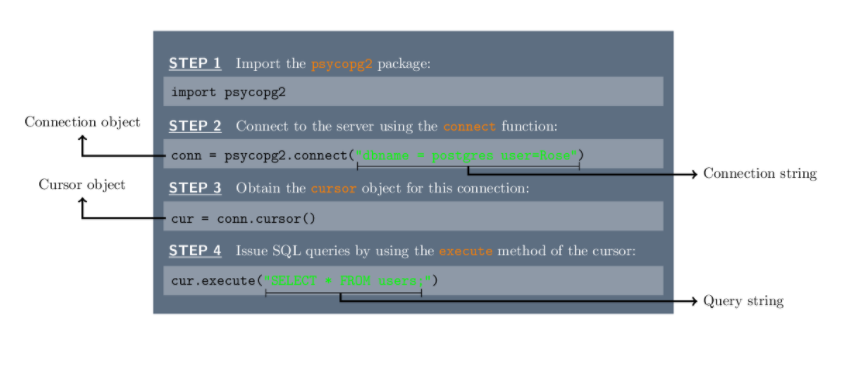

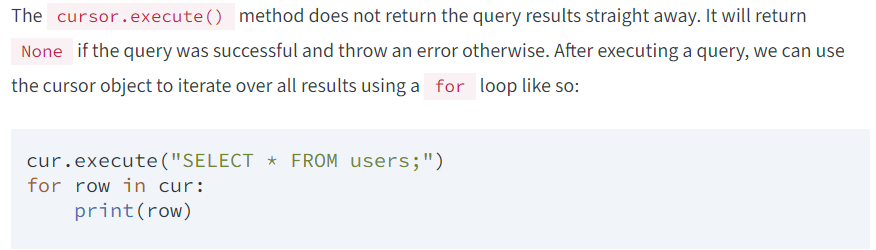

Alternatively, we can get the returned value — or values — by calling one of the two methods: [`cursor.fetchone()`](https://www.psycopg.org/docs/cursor.html?highlight=fetch#cursor.fetchone) or [`cursor.fetchall()`](https://www.psycopg.org/docs/cursor.html?highlight=fetch#cursor.fetchall). 

The `cursor.fetchone()` method returns the first result or `None` if there are no results. On the other hand, the `cursor.fetchall()` method returns a list containing each row from the result or an empty list `[]` if there are no rows matching the query.

`cur.execute("SELECT * FROM users;")
one_result = cur.fetchone()
all_results = cur.fetchall()`

In the above example, we assume that the `users` table is created.

# Concrete example

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()
cur.execute("SELECT * FROM users;")
users = cur.fetchall()
conn.close()`

Now that we have a basic understanding of how to connect and execute queries against a database, it's time to create our first Postgres table. We have been introduced to basic SQL commands such as `SELECT`, `CREATE`, `INSERT`, etc. We issued these commands in a SQLite engine, but they are not just restricted to SQLite, they are shared across most SQL systems.

In the same way that we run a `SELECT` query, we can create a table in Postgres by executing a [`CREATE TABLE` query](https://www.postgresql.org/docs/current/sql-createtable.html). For instance, creating a table containing the `ids`, `first name` and `last name` of the employees of a company can be achieved by issuing the following SQL query:

`CREATE TABLE employees (
   id integer PRIMARY KEY,
   first_name text,
   last_name text
);`

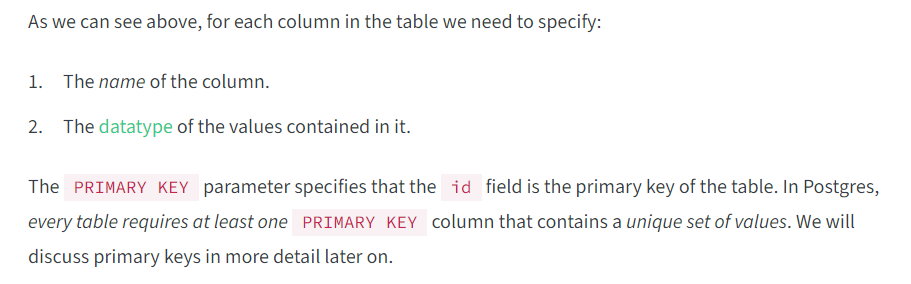

In this case the syntax is the same as we used in SQLite. Nonetheless, Postgres sometimes has a different syntax for issuing SQL commands. If a SQL command that we already know does not work in Postgres, we encourage to refer to the [documentation](https://www.postgresql.org/docs/current/sql.html) to make sure what is the correct syntax of the command that we are trying to issue.

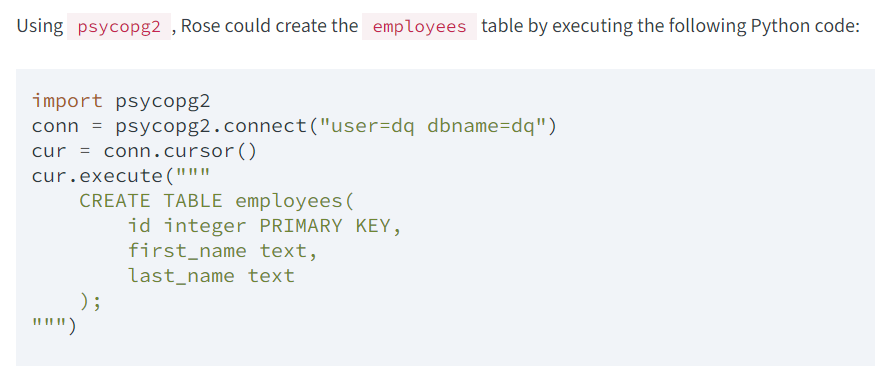

Note that the above query was written using triple quoted strings for formating purposes as it makes the query easier to read. However it is perfectly fine to write in a single line if we prefer, like so:

`cur.execute("CREATE TABLE employees(id integer PRIMARY KEY, first_name text, last_name text);")`

In the remainder of this file, we are going to learn how to recreate the `users` table.

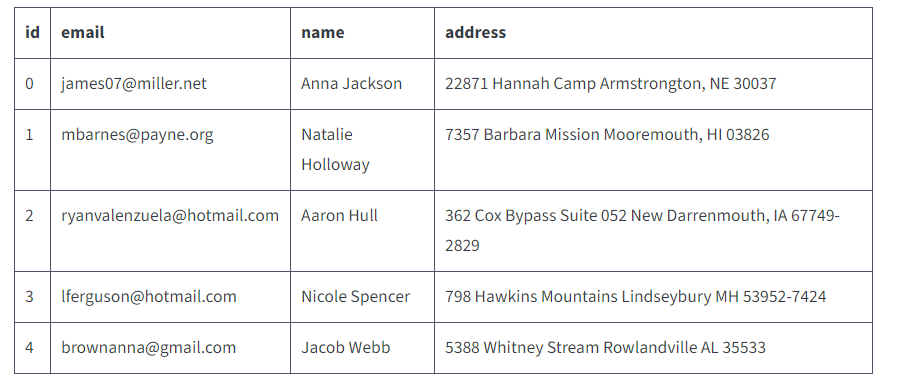

From the table above, we see that the `users` table has four columns. These columns have two different data types that we need to account for. 

The first is the `integer` type for each of the `ids` and the rest are `string` types. Postgres, like other relational databases, is type sensitive meaning we have to specify types for each column of the table we create.

**Task**

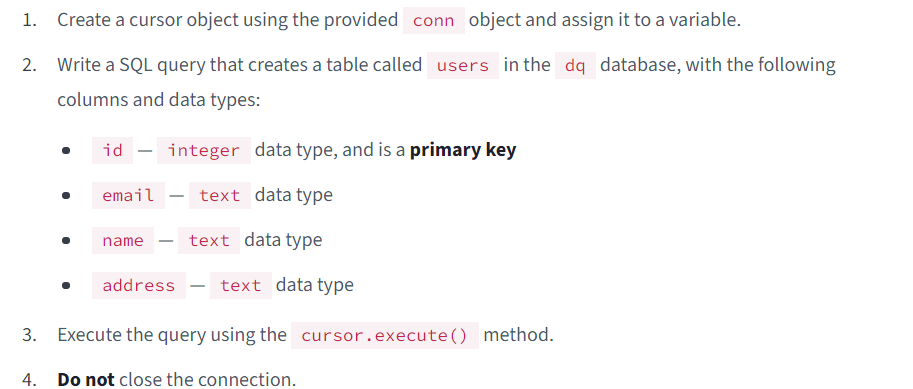

**Answer**

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()
cur.execute(
"""
    CREATE TABLE users (
        id integer PRIMARY KEY, 
        email text, 
        name text, 
        address text
    );
""")`

If we were to inspect the `dq` database now, we would notice that there actually isn't a table named `users` inside of it. This isn't a bug — it's because of a concept called [`SQL transactions`](https://www.postgresql.org/docs/12/tutorial-transactions.html). 

In short, transactions are a mechanism that Postgres uses to ensure data consistency. It makes it so that queries are grouped together and changes are only saved when explicitly requested. This contrasts with SQLite, where every query we made that modified the data was executed and immediately changed the database.

**Task**

Let's verify that the table `users` was not created.

**Answer**

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()
cur.execute("SELECT * FROM users;")`

As we observed, the table `users` was not created. When we tried to access it, we got an error saying:

`ProgrammingError: relation "users" does not exist
LINE 1: SELECT * FROM users;`

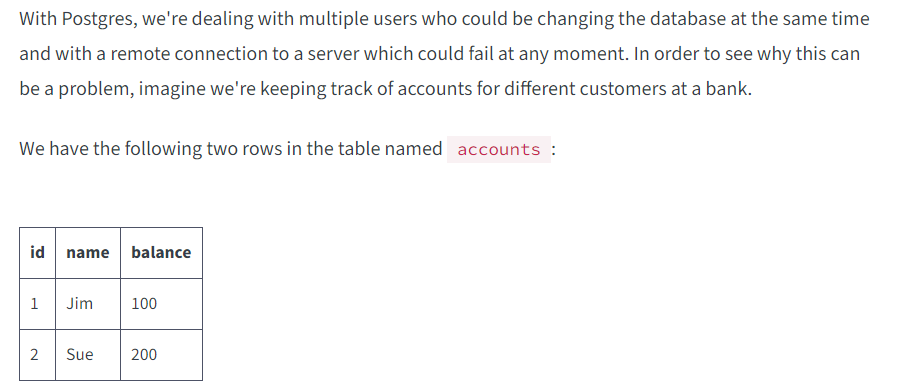

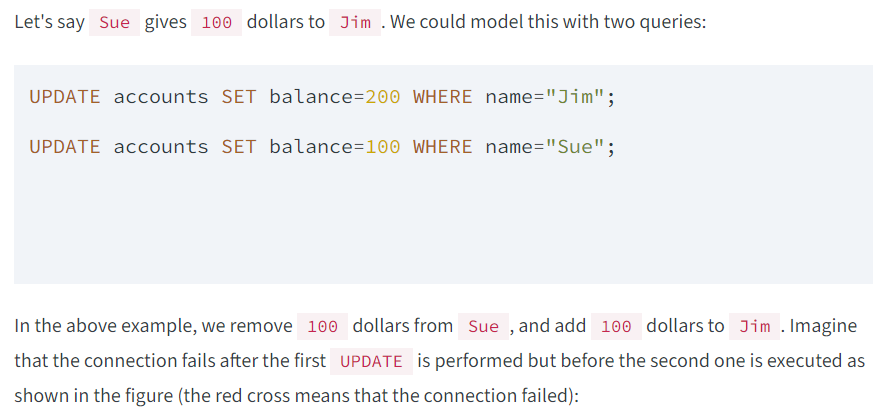

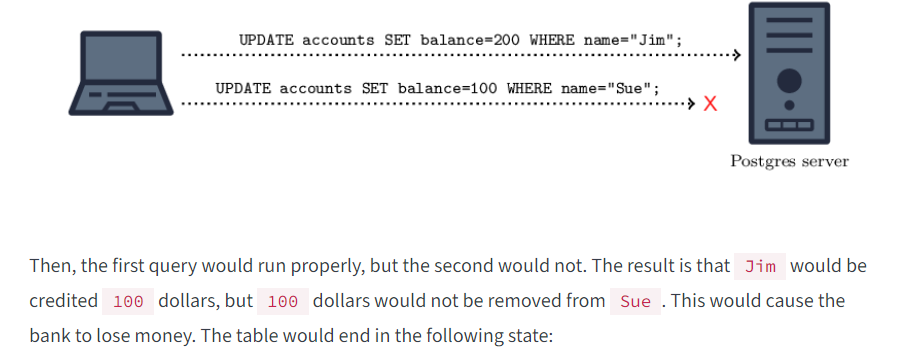

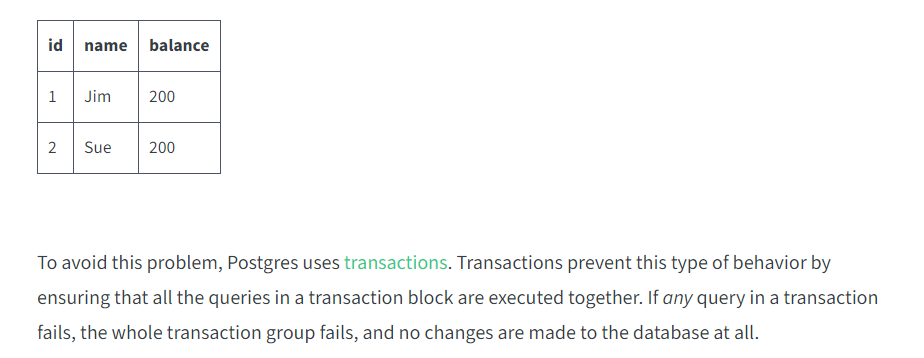

After having issued some queries, to tell Postgres that we want to execute them as a transaction group we commit the changes by executing the [`connection.commit()` method](https://www.psycopg.org/docs/connection.html#connection.commit):

`conn.commit()`

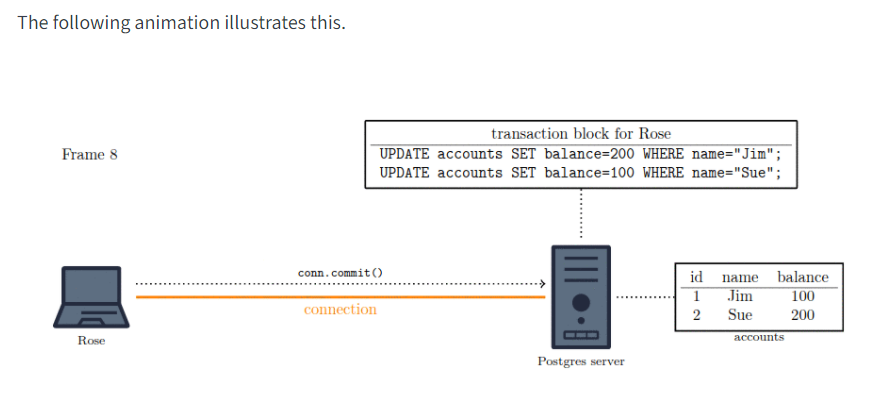

Notice how the values in the table do not change until the transaction is committed. Whenever we open a connection in `psycopg2`, a new transaction will automatically be created. All queries are grouped together up until those are committed. When a commit is executed, the Postgres engine will run all the queries at once.

We can think of committing as saving a document in a text editor. Say we open a text document and add a few lines of text. The document won't really be modified until we save the changes. This is what committing the changes in a database does.

If we don't want to apply the changes in the transaction block, we can call the [`connection.rollback()` method](https://www.psycopg.org/docs/connection.html#connection.rollback) to remove the transaction. Not calling either of these methods will cause the transaction to stay in a pending state, and will result in the changes not being applied to the database.

**Task**

Let's recreate the `users` table but this time, commit our changes.

**Answer**

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
query_string = """
    CREATE TABLE users(
        id integer PRIMARY KEY, 
        email text,
        name text,
        address text
    );
"""
cur = conn.cursor()
cur.execute(query_string)
conn.commit()
conn.close()`

Above we mentioned that changes are only effective on the database if we commit them.

However, until close the connection our future queries using that same connection will already take these changes into account as if they had been committed. They will remain invisible for other users only until we commit. 

If we close the connection before committing them, then they will simply disappear. This means that during that time, not everyone will have the same view over the database.

Back to our previous example where we're keeping track of accounts for different customers of a bank. Let's say, as before, that we have the following two rows in the table:

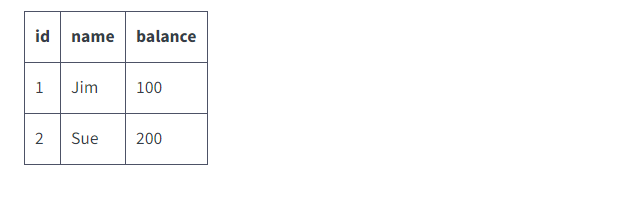

Imagine that Waqas executes the two following queries without committing and without closing the connection:

`UPDATE accounts SET balance=200 WHERE name="Jim";
UPDATE accounts SET balance=100 WHERE name="Sue";`

Then, if he queries the accounts table, he will see his changes. But if another user — say, Ali — connects to the database and queries that same table, he will still see a balance of 100 for Jim and 200 for Sue. This means that both users have a different view of the database, as illustrated in the following figure.

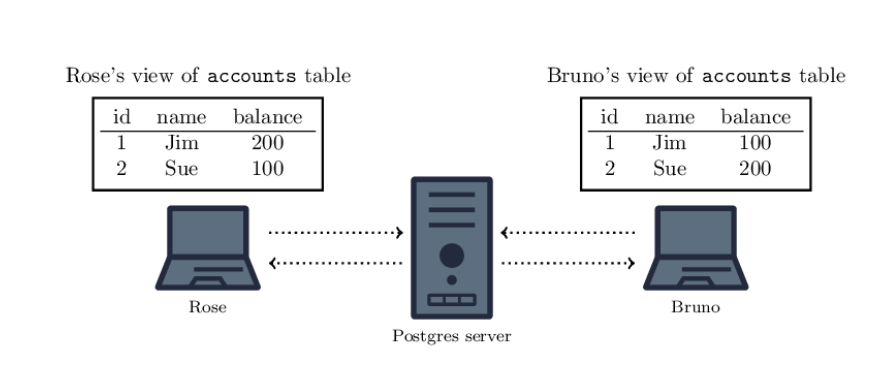

Let's see this by ourselves!

`import psycopg2`

`conn1 = psycopg2.connect("dbname=dq user=dq")
cur1 = conn1.cursor()
cur1.execute("INSERT INTO users 
              VALUES (%s, %s, %s, %s);", 
              (1, 'alice@dataquest.io', 'Alice', '99 Fake Street'))`
              
`conn2 = psycopg2.connect("dbname=dq user=dq")
cur2 = conn2.cursor()`


`# step 1
cur1.execute("SELECT * FROM users;")
view1_before = cur1.fetchall()`

`# step 2
cur2.execute("SELECT * FROM users;")
view2_before = cur2.fetchall()`

`# step 3
conn1.commit()`

`# step 4
cur2.execute("SELECT * FROM users;")
view2_after = cur2.fetchall()`

Before we move on, now that we have a better understanding of how Postgres works to recapitulate a general workflow that we can use to interact with a Postgres database using Python's `psycopg2` module.

We had already seen part of this workflow when we first explained how to interact with the database. We are going to make it complete by adding the steps that we have just learned, namely, committing the changes.

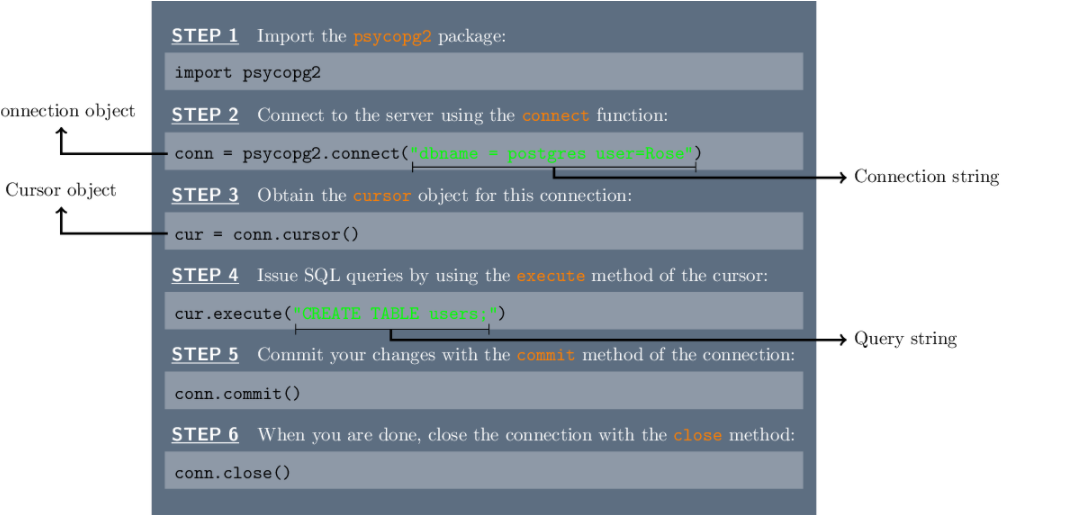

Of course, in general we can issue more than one query between each commit. All the queries issued between two commits are grouped together into a **transaction block**. A transaction block is executed when the `connection.commit()` method is called and its changes are applied if and only if all of the queries in it are successful. This mechanism allows users to ensure that queries that need to be executed together are executed as such.

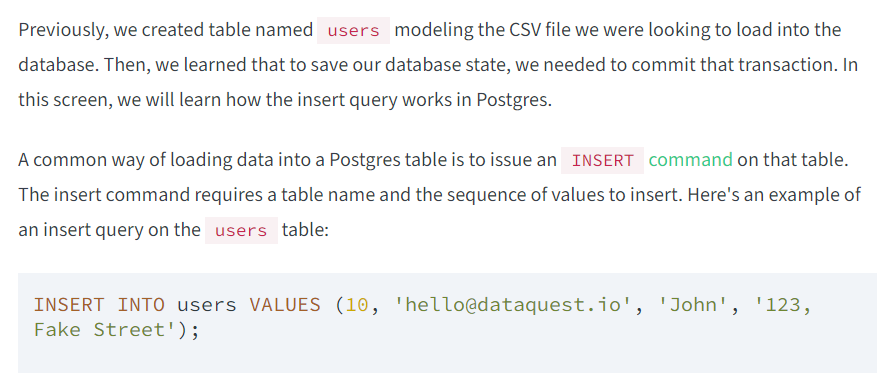

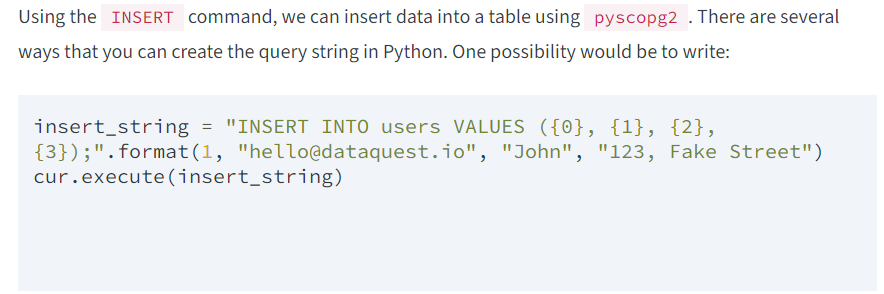

However we do not recommend to format the string ourself. Executing the above code will result in an error. The reason for this is that the value of `insert_string` is actually the following:

`INSERT INTO users VALUES (1, hello@gmail.com, John, 124, Fake Street);`


As we can see, we are trying to insert five values rather than four as the street number and the street name were separated by a comma. Moreover, the email, name and street values are not represented as strings. For example, the email should rather have value the 'hello@gmail.com' (notice the missing quotation marks above).

The recommended way is to use the `cursor.execute()` method without string formatting. If we look at this method's [`documentation`](https://www.psycopg.org/docs/cursor.html#execute) we will see that we can pass values that will be correctly converted and replaced into the query string.

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()
cur.execute("INSERT INTO users VALUES (%s, %s, %s, %s);", (1, "hello@gmail.com", "John", "123, Fake Street"))
conn.commit()`

Just as with table creation, we will need to commit our changes to ensure that they are applied on the database.

The behavior of `%s` is similar to that of `{}` in Python string formatting, they both act as placeholders for actual values. For the details of how to use these substitutions appropriately, please refer to the [`Passing parameters to SQL queries`](https://www.psycopg.org/docs/usage.html#query-parameters) section. We'll highlight a couple of them below.

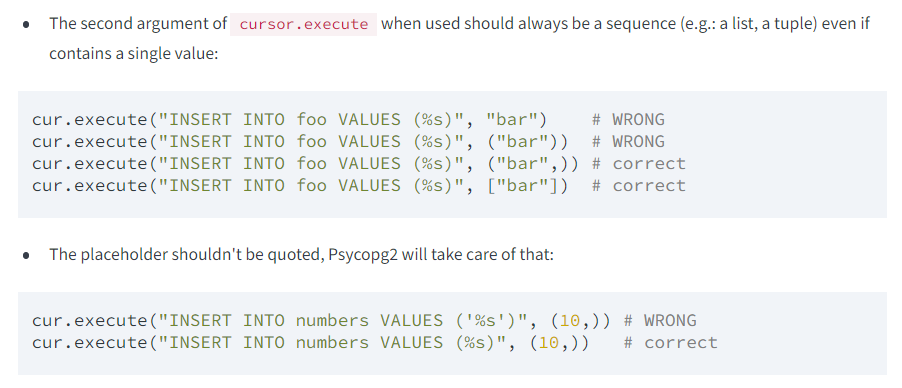

`# concrete example`

`import psycopg2
conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()
cur.execute("INSERT INTO users VALUES (%s, %s, %s, %s);", 
            (2, 'alice@gmail.co', 'Alice', '99 Fake Street'))
conn.commit()
conn.close()`

We have learned how to insert a user into the `users` table by executing an `INSERT` query. Now we are going to add all of the users contained in the file `user_accounts.csv` into the `users` table.

This dataset contains 
10000
 users so it would take a very long time to manually insert them one by one using the same type of query that we did above. Fortunately, with Python thanks to the `psycopg2` package and [csv module](https://docs.python.org/3/library/csv.html) there is a simple way to insert all users from a CSV file into a Postgres table.

This module allows us to easily load a CSV file into Python and then iterate over all of its rows as shown in the following code:

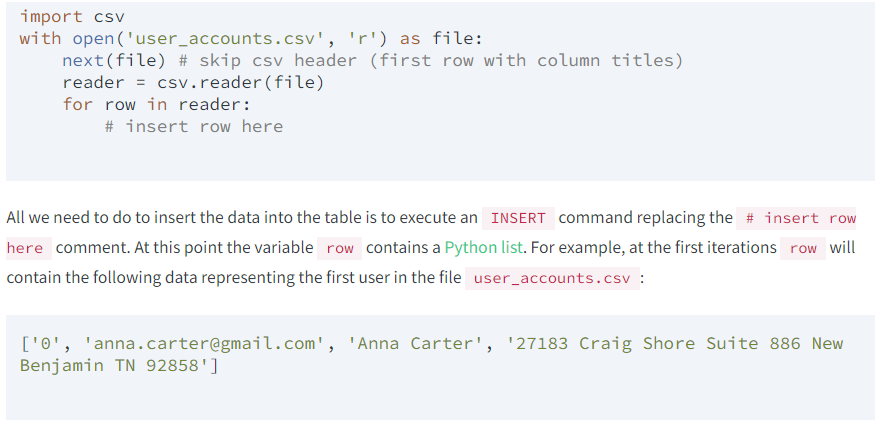

This row can be inserted into the database by passing the individual values as we did;

`cur.execute("INSERT INTO users VALUES (%s, %s, %s, %s);", (row[0], row[1], row[2], row[3]))`

Actually, since `row` is already a list, there is an alternative, more concise, way to insert the data contained in it without breaking down the individual values of the `row` list:

`cur.execute("INSERT INTO users VALUES (%s, %s, %s, %s);", row)`

**Task**

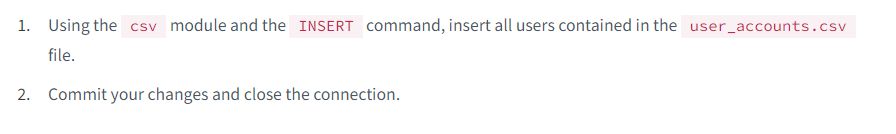

**Answer**

`import psycopg2
import csv`

`conn = psycopg2.connect("dbname=dq user=dq")
cur = conn.cursor()`

`with open('user_accounts.csv', 'r') as file:
    next(file) # skip csv header
    reader = csv.reader(file)`
    `for row in reader:
        cur.execute("INSERT INTO users VALUES (%s, %s, %s, %s);", row)`
        
`conn.commit()
conn.close()`

In this file, we learned:

1. The difference between SQLite and Postgres and how the server-client model works
2. How to connect to a Postgres database
3. How to create a table and load a CSV file into it
4. What are transactions and why they are important

In the next file, we will focus on an improved way to build our Postgres table using Postgres specific data types.